In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from joblib import dump, load
import os
from matplotlib import pyplot as plt
import joblib

In [148]:
# Hyperparameters
n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
end=len(df)
length = 5000
start=end-length
df = df.iloc[start:end]

df=df[['Open Time','High', 'Low', 'Close', 'Volume', 'Quote Asset Volume',
       'Number of Trades', 'Taker Buy Base Asset Volume',
       'Taker Buy Quote Asset Volume', 'Moving_Avg_Close_1000X_n_steps',
       'Moving_Avg_Close_100X_n_steps', 'Moving_Avg_Close_10X_n_steps', 'MACD',
       'RSI', 'High_RollingMax', 'Low_RollingMin', 'Fibonacci_Level_1',
       'Fibonacci_Level_2', 'Fibonacci_Level_3', 'Bollinger_High',
       'Bollinger_Middle', 'Bollinger_Low', 'Stochastic_Oscillator', 'ATR']]

predicting_index = df.columns.get_loc('Close')
scaled_data = df.values
# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaled_data = scaler.fit_transform(df.values)

X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.95)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

In [ ]:
# define model
model = GradientBoostingRegressor()
model.fit(X_train_flat, y_train)

# Predict on test set
y_test_preds = model.predict(X_test_flat)

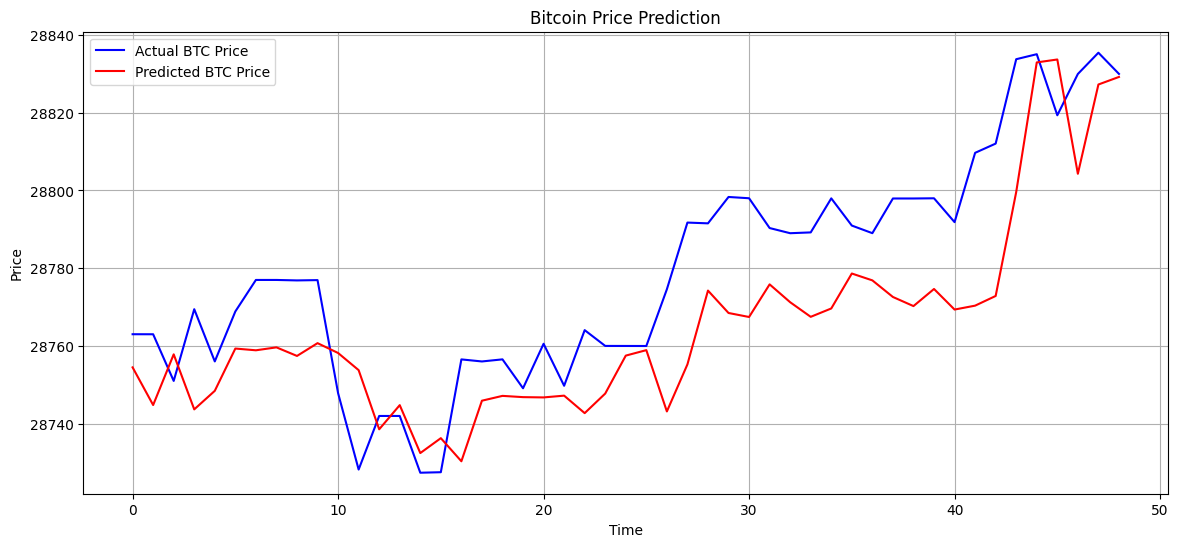

In [100]:
# 1000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

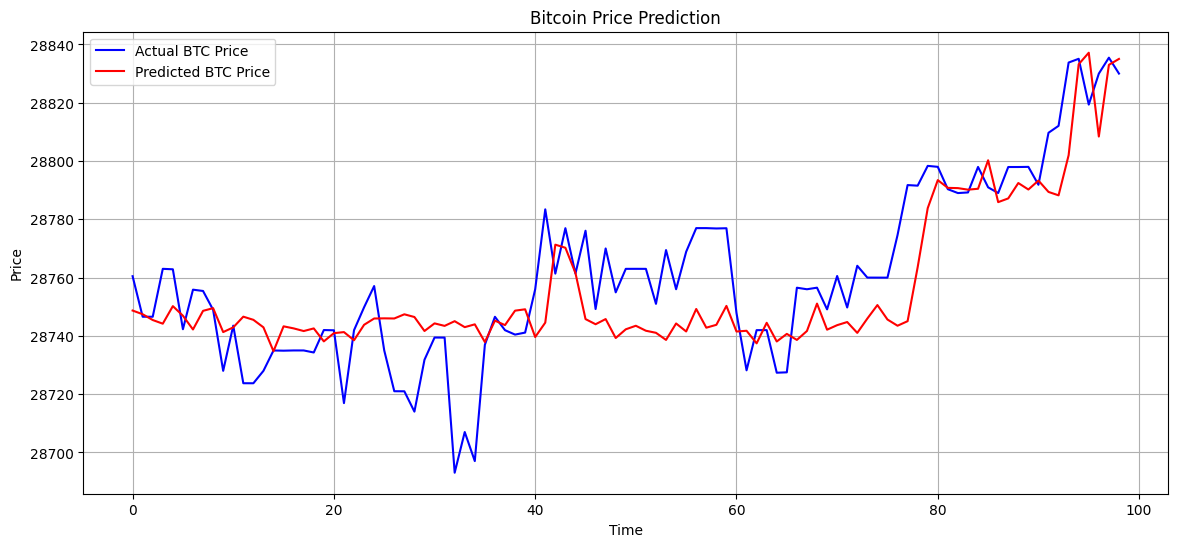

In [92]:
# 2000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

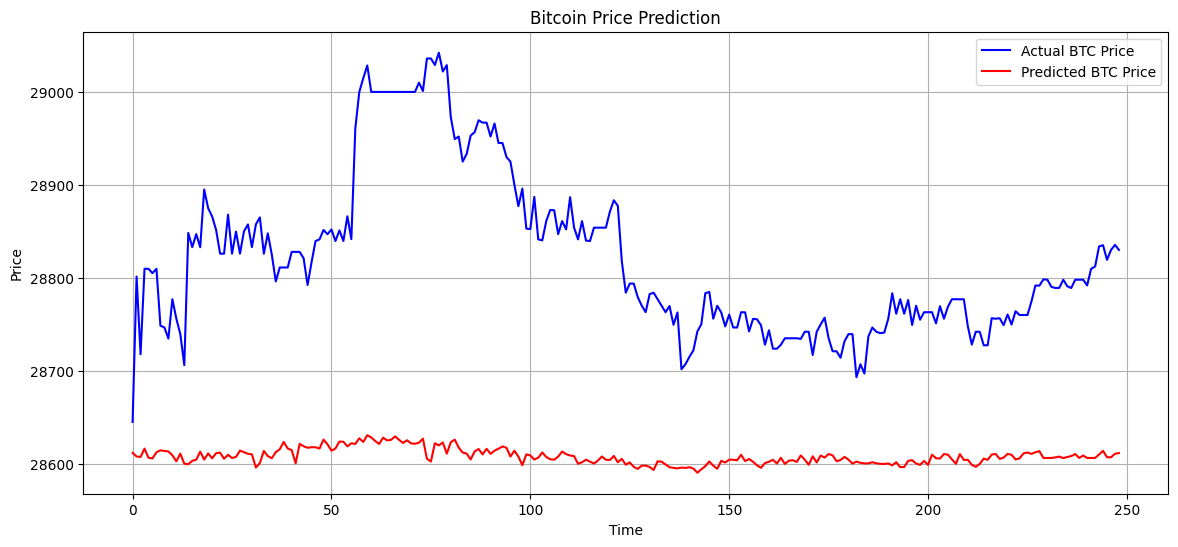

In [95]:
# 5000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Increaing complexity of the model so it fits on larget data:

In [114]:
# Instantiate Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=500,  # Increase from 100 to 500
                                  max_depth=5,      # Increase from 3 to 5
                                  min_samples_split=2,
                                  learning_rate=0.01, # Decrease from 0.1 to 0.01
                                  loss='squared_error')

model.fit(X_train_flat, y_train)
y_test_preds = model.predict(X_test_flat)


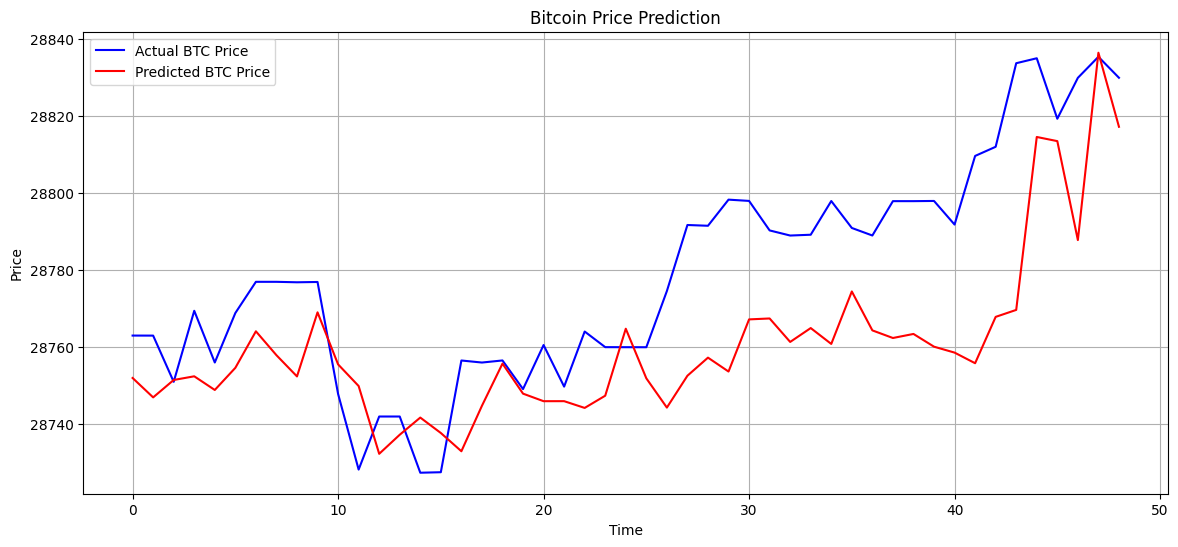

In [105]:
# 1000 points, 500 estimators, 5 max_depth, 0.01 learning rate
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

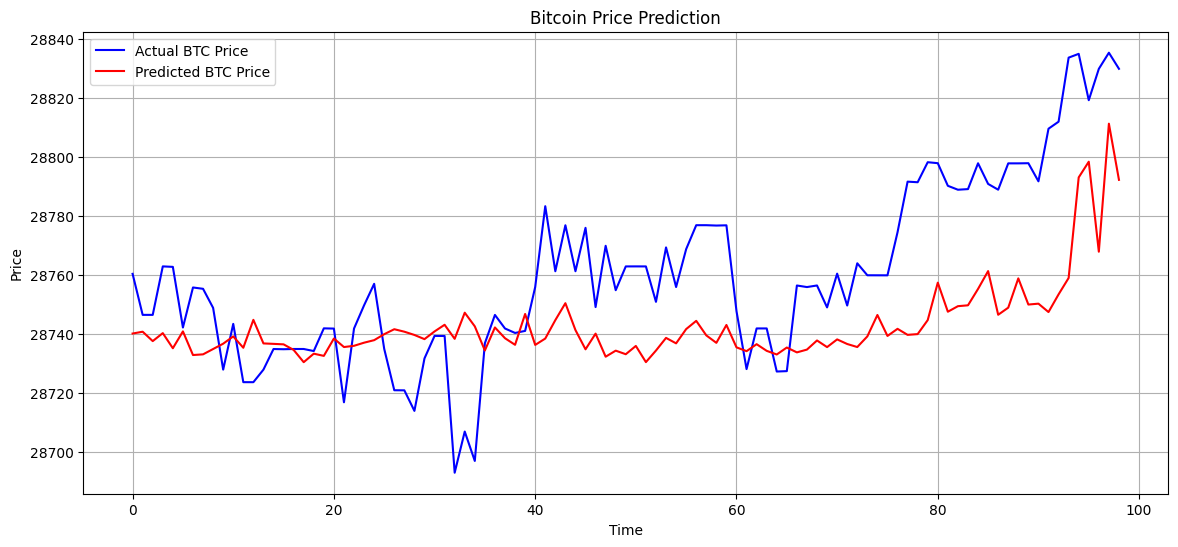

In [110]:
# 2000 points, 500 estimators, 5 max_depth, 0.01 learning rate
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

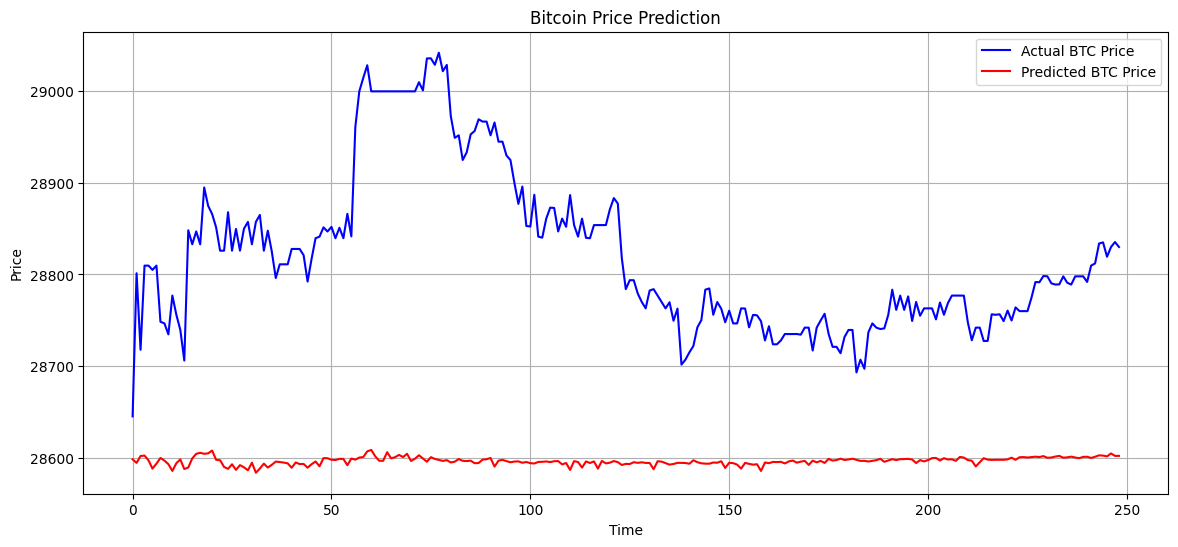

In [115]:
# 5000 points, 500 estimators, 5 max_depth, 0.01 learning rate
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [129]:
# Instantiate Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=5000,  # 100 
                                  max_depth=10,      # 3 
                                  min_samples_split=2,
                                  learning_rate=1, #  0.1 
                                  loss='squared_error')

model.fit(X_train_flat, y_train)
y_test_preds = model.predict(X_test_flat)

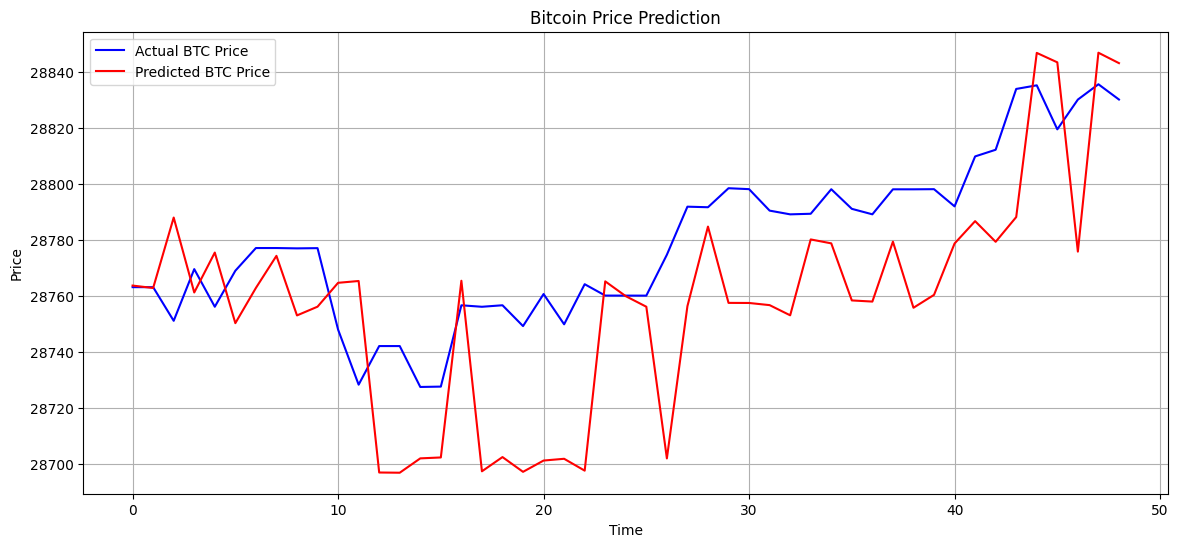

In [123]:
# 1000 points, 5000 estimators, 10 max_depth, 1 learning rate
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

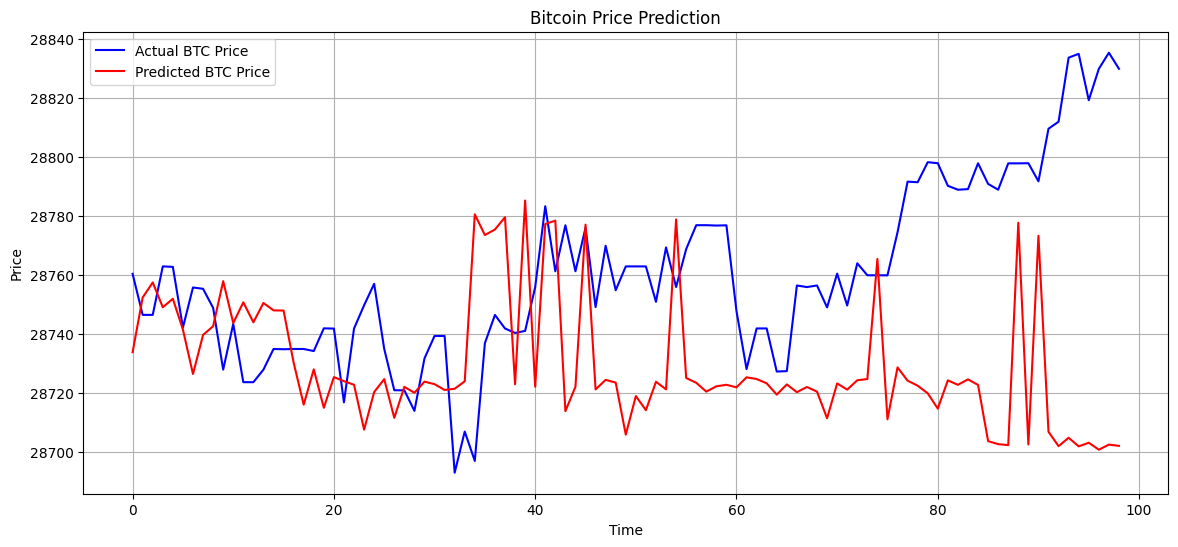

In [127]:
# 2000 points, 5000 estimators, 10 max_depth, 1 learning rate
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

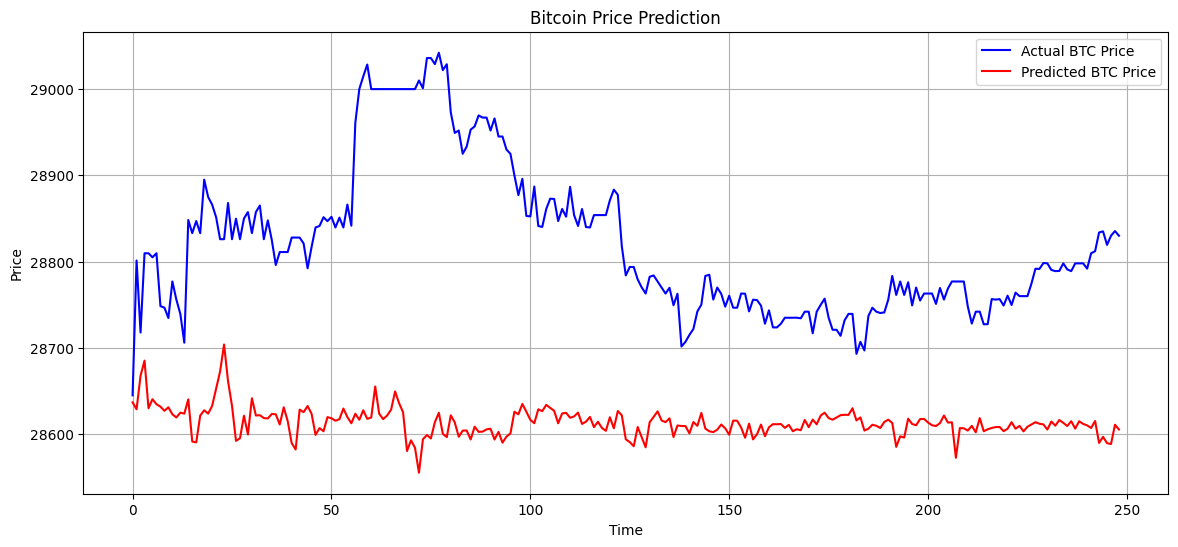

In [130]:
# 5000 points, 5000 estimators, 10 max_depth, 1 learning rate
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
# Instantiate Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=5000,  # 100 
                                  max_depth=50,      # 3 
                                  min_samples_split=2,
                                  learning_rate=1, #  0.1 
                                  min_samples_leaf=6,
                                  n_iter_no_change=5, 
                                  loss='squared_error')

model.fit(X_train_flat, y_train)
y_test_preds = model.predict(X_test_flat)

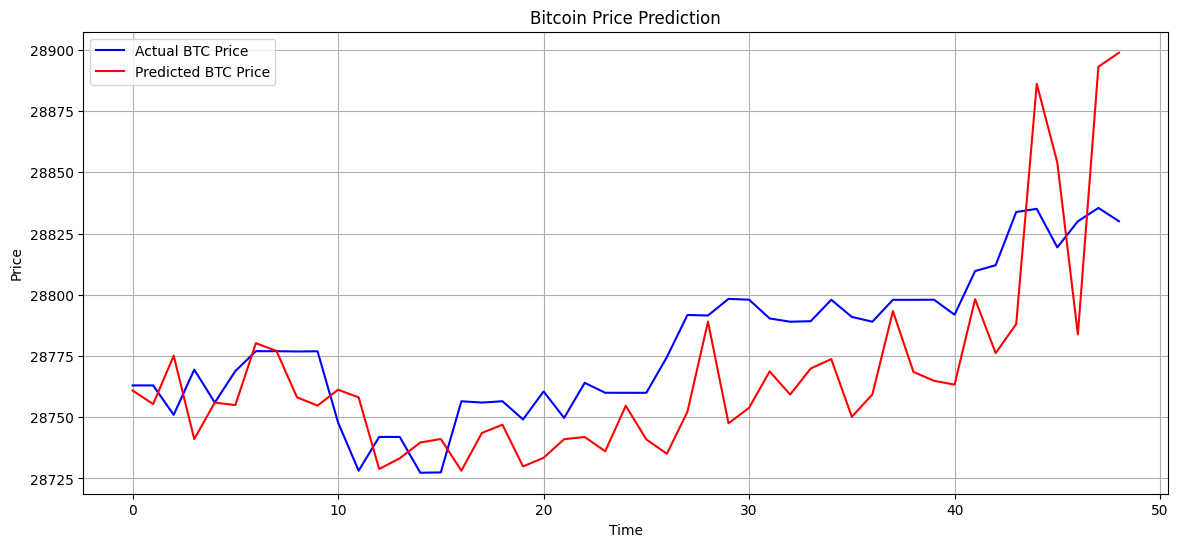

In [143]:
# 1000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

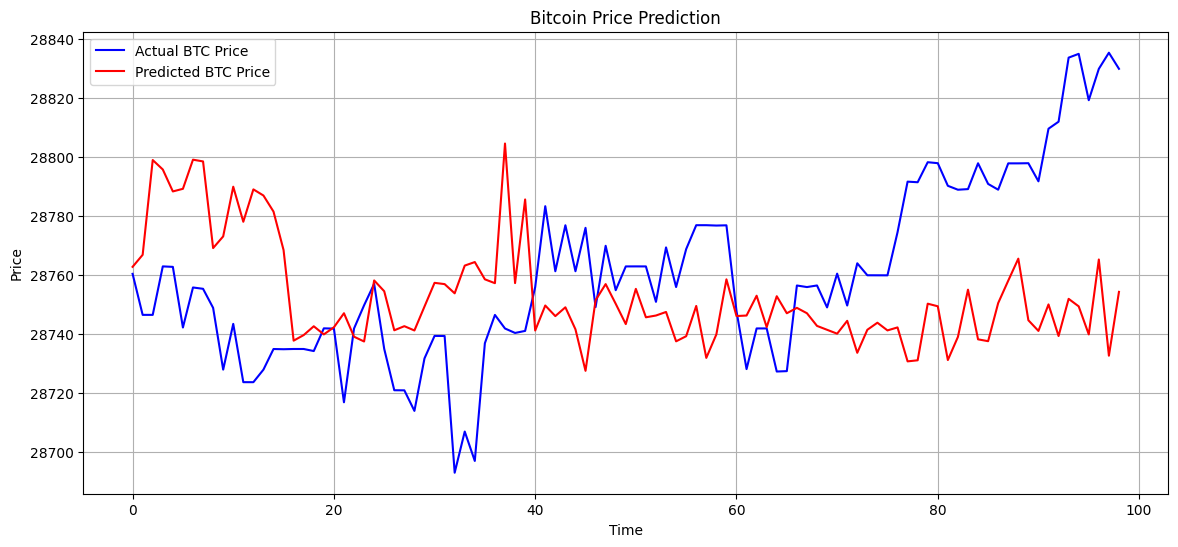

In [147]:
# 2000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

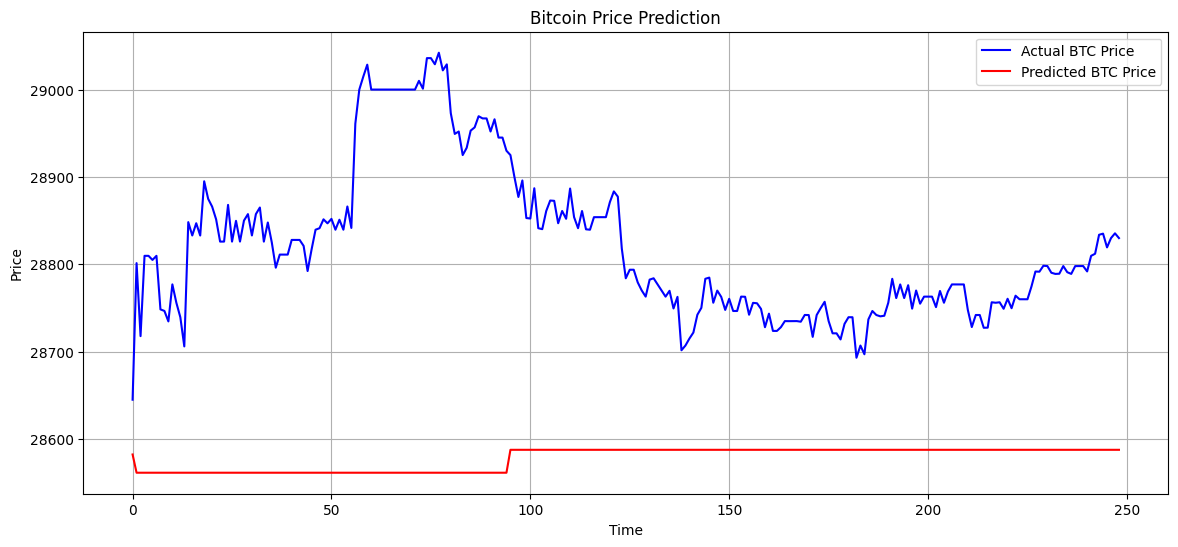

In [150]:
# 5000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [152]:
# Instantiate Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=10000,  # 100 
                                  max_depth=100,      # 3 
                                  min_samples_split=2,
                                  learning_rate=1, #  0.1 
                                  min_samples_leaf=6,
                                  n_iter_no_change=5, 
                                  loss='squared_error')

model.fit(X_train_flat, y_train)
y_test_preds = model.predict(X_test_flat)

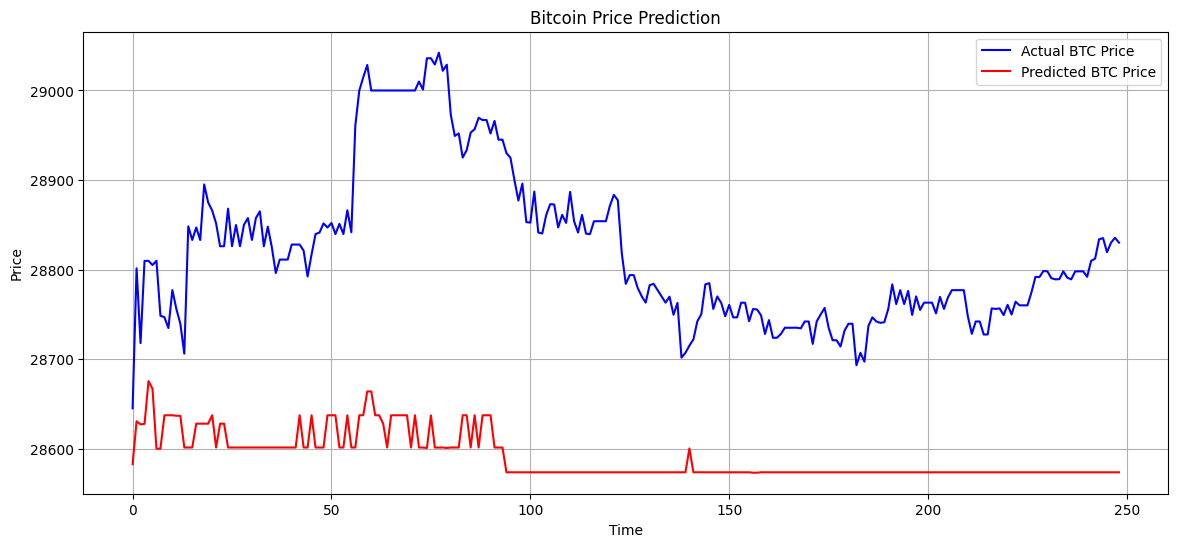

In [153]:
# 5000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [169]:
# Hyperparameters
n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
end=len(df)
length = 1000
start=end-length
df = df.iloc[start:end]

df=df[['Open Time','Close', 'Volume']]

predicting_index = df.columns.get_loc('Close')
scaled_data = df.values
# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaled_data = scaler.fit_transform(df.values)

X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.95)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

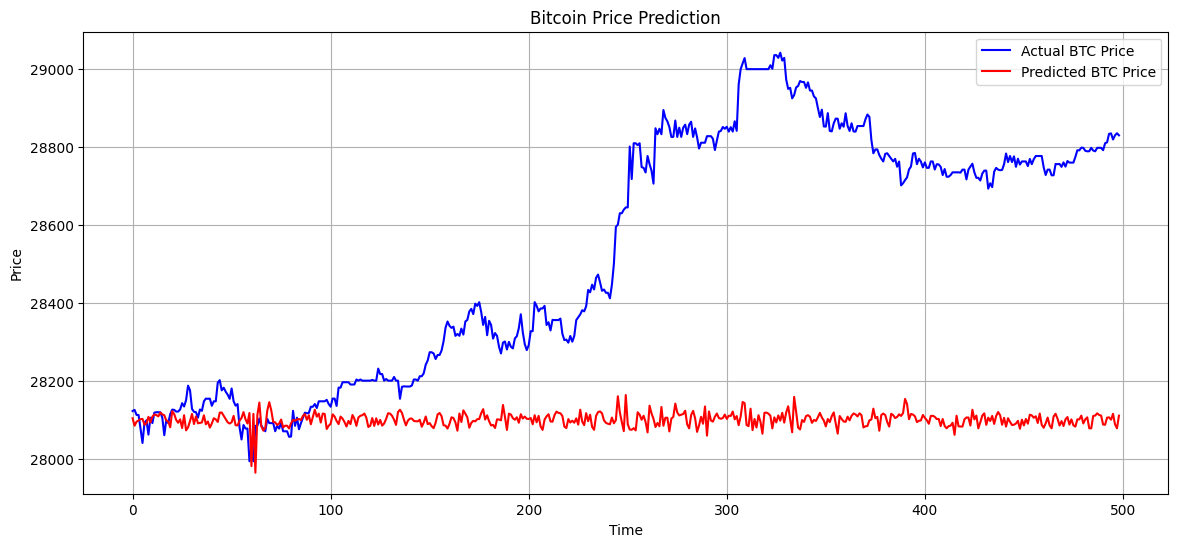

In [173]:
# Instantiate Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=10000,  # 100 
                                  max_depth=1000,      # 3 
                                  min_samples_split=2,
                                  learning_rate=1, #  0.1 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model.fit(X_train_flat, y_train)
y_test_preds = model.predict(X_test_flat)
# 10000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

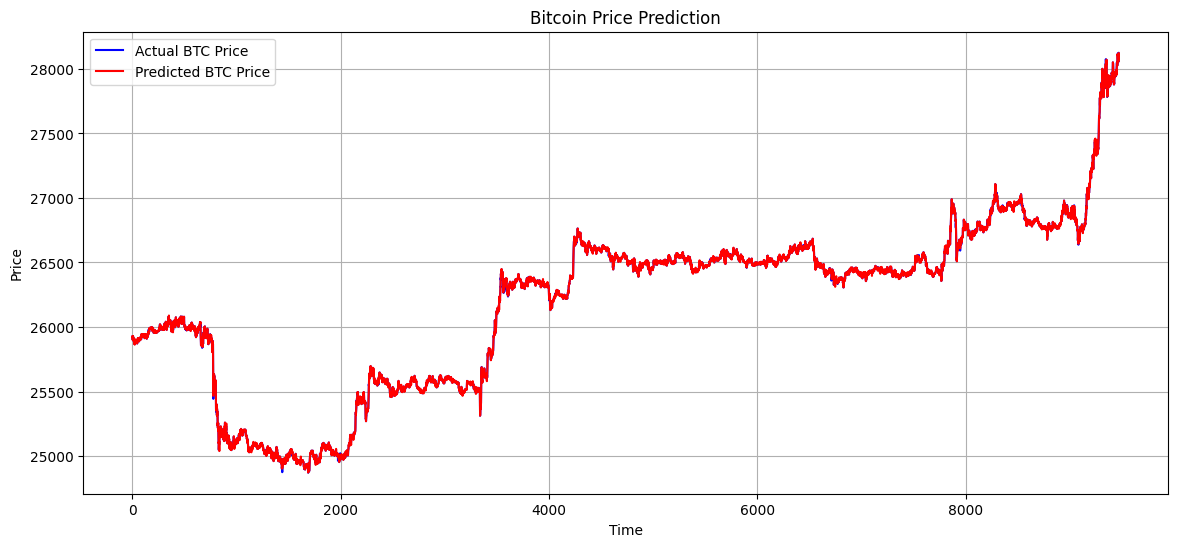

In [177]:
y_test_preds = model.predict(X_train_flat)
# 10000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_train, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [180]:
# Hyperparameters
n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
end=len(df)
length = 100000
start=end-length
df = df.iloc[start:end]

df=df[['Open Time','Close', 'Volume']]

predicting_index = df.columns.get_loc('Close')
scaled_data = df.values
# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaled_data = scaler.fit_transform(df.values)

X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.95)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

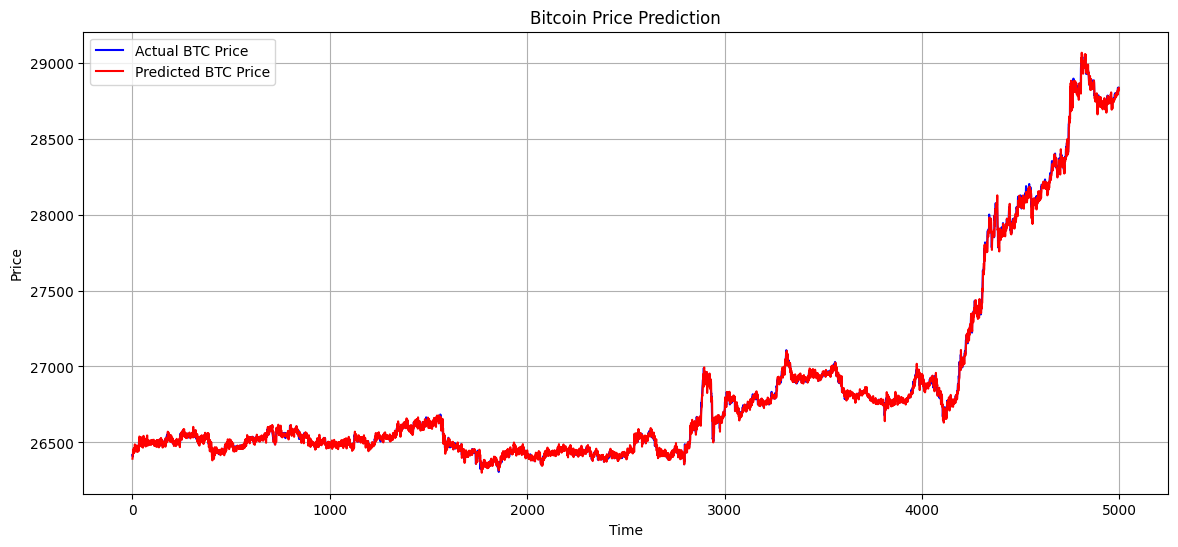

In [181]:
# Instantiate Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=10000,  # 100 
                                  max_depth=1000,      # 3 
                                  min_samples_split=2,
                                  learning_rate=1, #  0.1 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model.fit(X_train_flat, y_train)
y_test_preds = model.predict(X_test_flat)
# 10000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [187]:
import joblib
# Save the trained model
joblib.dump(model, 'model_filename.pkl')

['model_filename.pkl']

The model above is the best model that is trained until July 1st, 2023. The input is 100K of 1min data for BTC-USDT with only 3 features of 'Open Time','Close', 'Volume'. The Gradient Boosting model took 9min to train on my local Mac using CPU. The hyperparameters are as follow: "n_estimators=10000, max_depth=1000,    min_samples_split=2, learning_rate=1,min_samples_leaf=10,n_iter_no_change=10, loss='squared_error'. 

Testing on the entire data set:

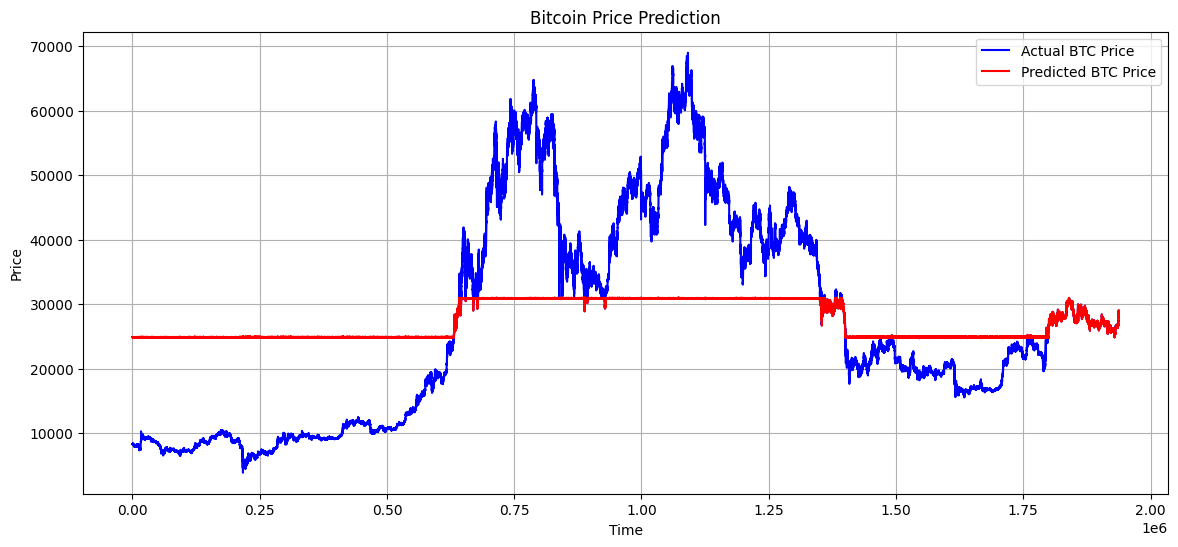

In [188]:
# Hyperparameters
n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
df=df[['Open Time','Close', 'Volume']]

scaled_data = df.values

X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

y_test_preds = model.predict(X_test_flat)

#entire data set
plt.figure(figsize=(14,6))
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

This result is very interesting. As you can see, the model works very well in the last 100K data (that it's intially trained on) AND ALSO in the same historic data where the close price comes to the same range (25-30K $). It seems like if we train this model on the entire dataset we'll get good results (basically building a model that can predict the entire market)

Loading the model and parameters in a single cell when you reopen this file:

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from joblib import dump, load
import os
from matplotlib import pyplot as plt
import joblib

model = GradientBoostingRegressor(n_estimators=10000,  # 100 
                                  max_depth=1000,      # 3 
                                  min_samples_split=2,
                                  learning_rate=1, #  0.1 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load('GB_model_parameters_10000_1000_2_1_10_10.pkl')

# Hyperparameters
n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
end=len(df)
length = 100000
start=end-length
df = df.iloc[start:end]

df=df[['Open Time','Close', 'Volume']]

predicting_index = df.columns.get_loc('Close')
scaled_data = df.values

X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.95)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

y_test_preds = model.predict(X_test_flat)

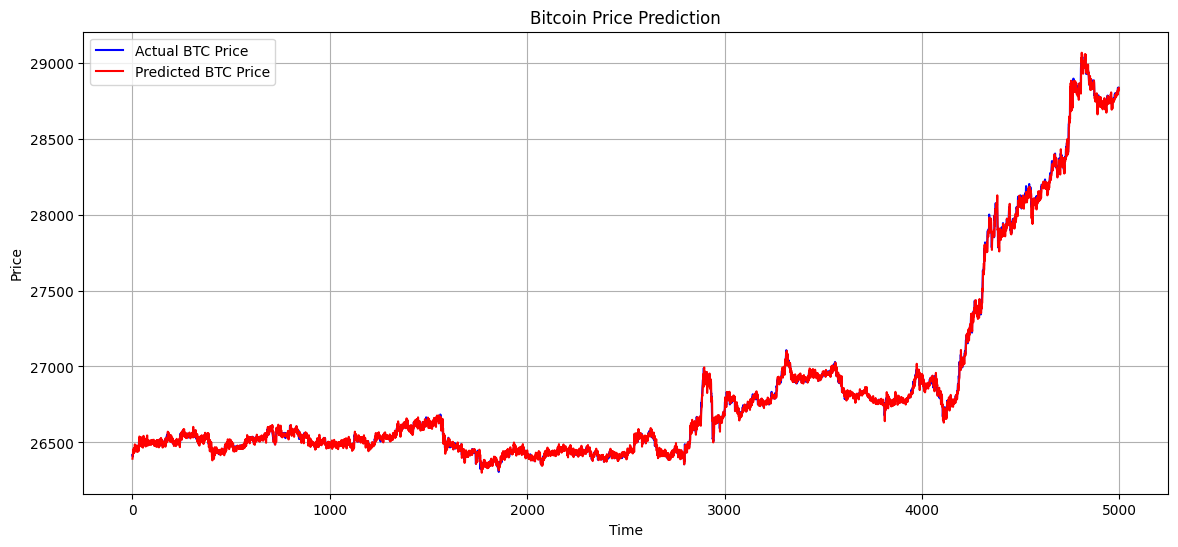

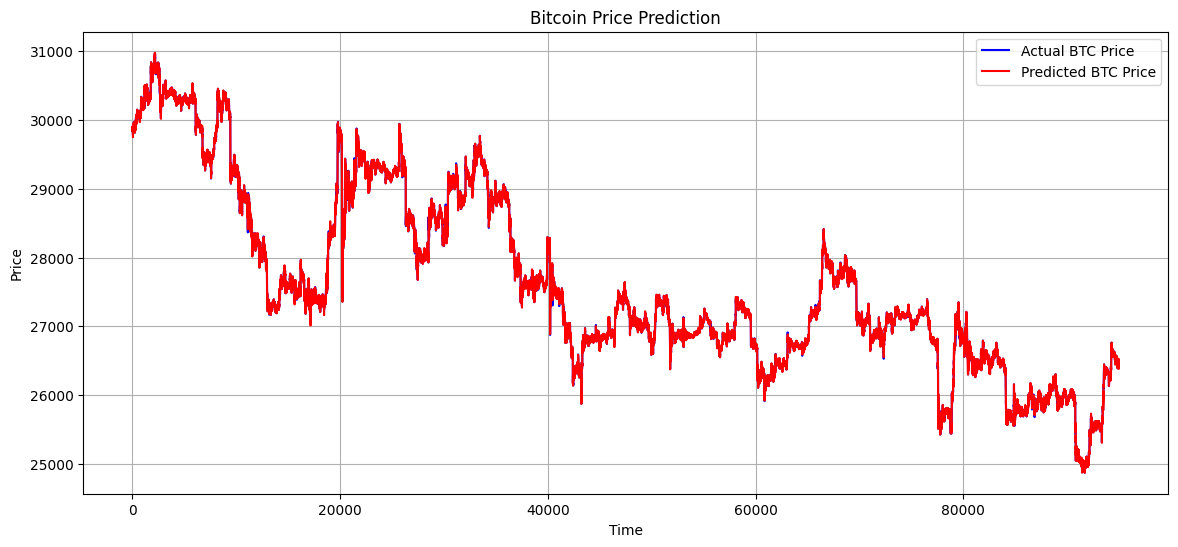

In [71]:
# prediction
start=1250000
end=1500000
plt.figure(figsize=(14,6))
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# train
y_test_preds = model.predict(X_train_flat)
# 10000 points
plt.figure(figsize=(14,6))
# set x axis as "Open Time" in df:
x_axis = df.loc[train_size:, 'Open Time']
plt.plot(y_train, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

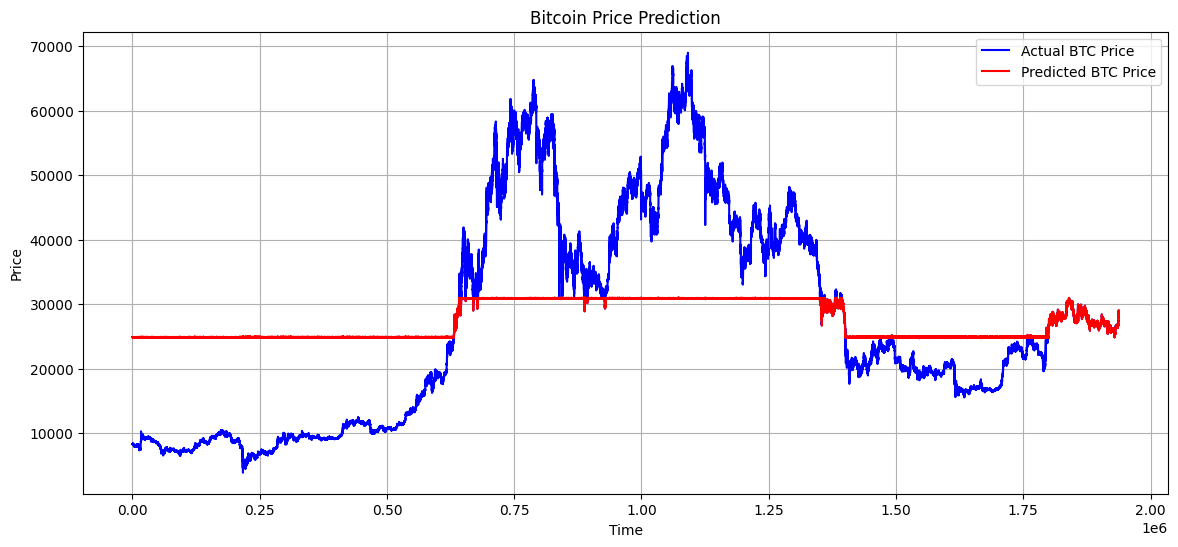

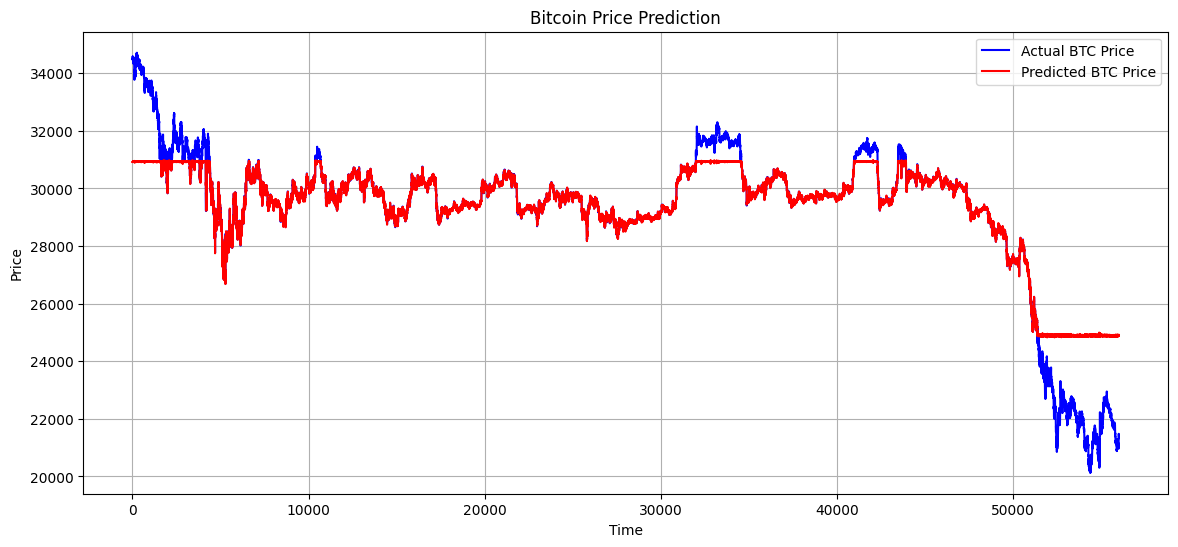

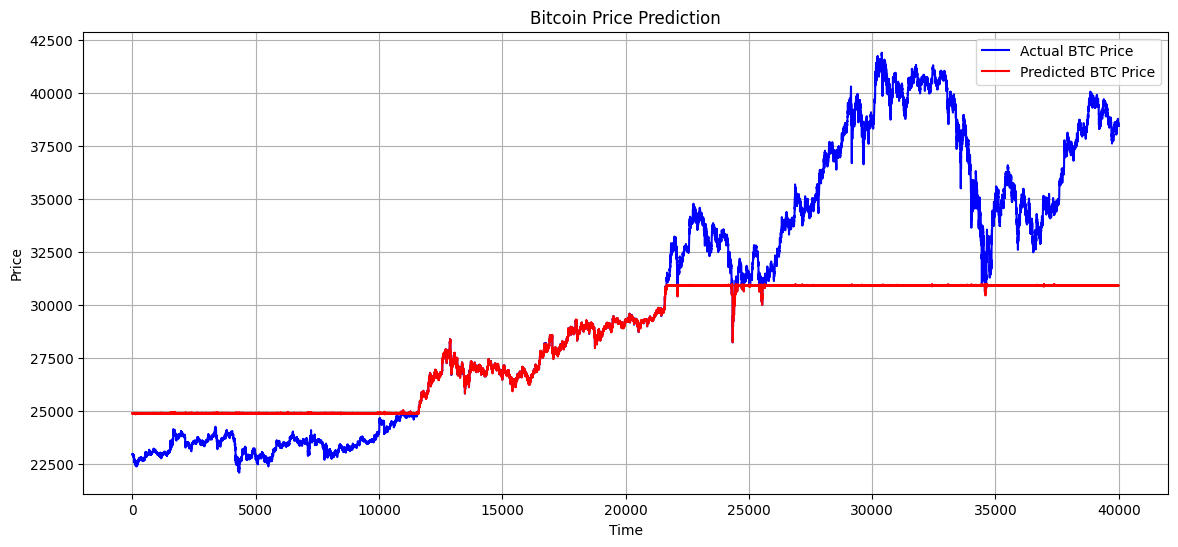

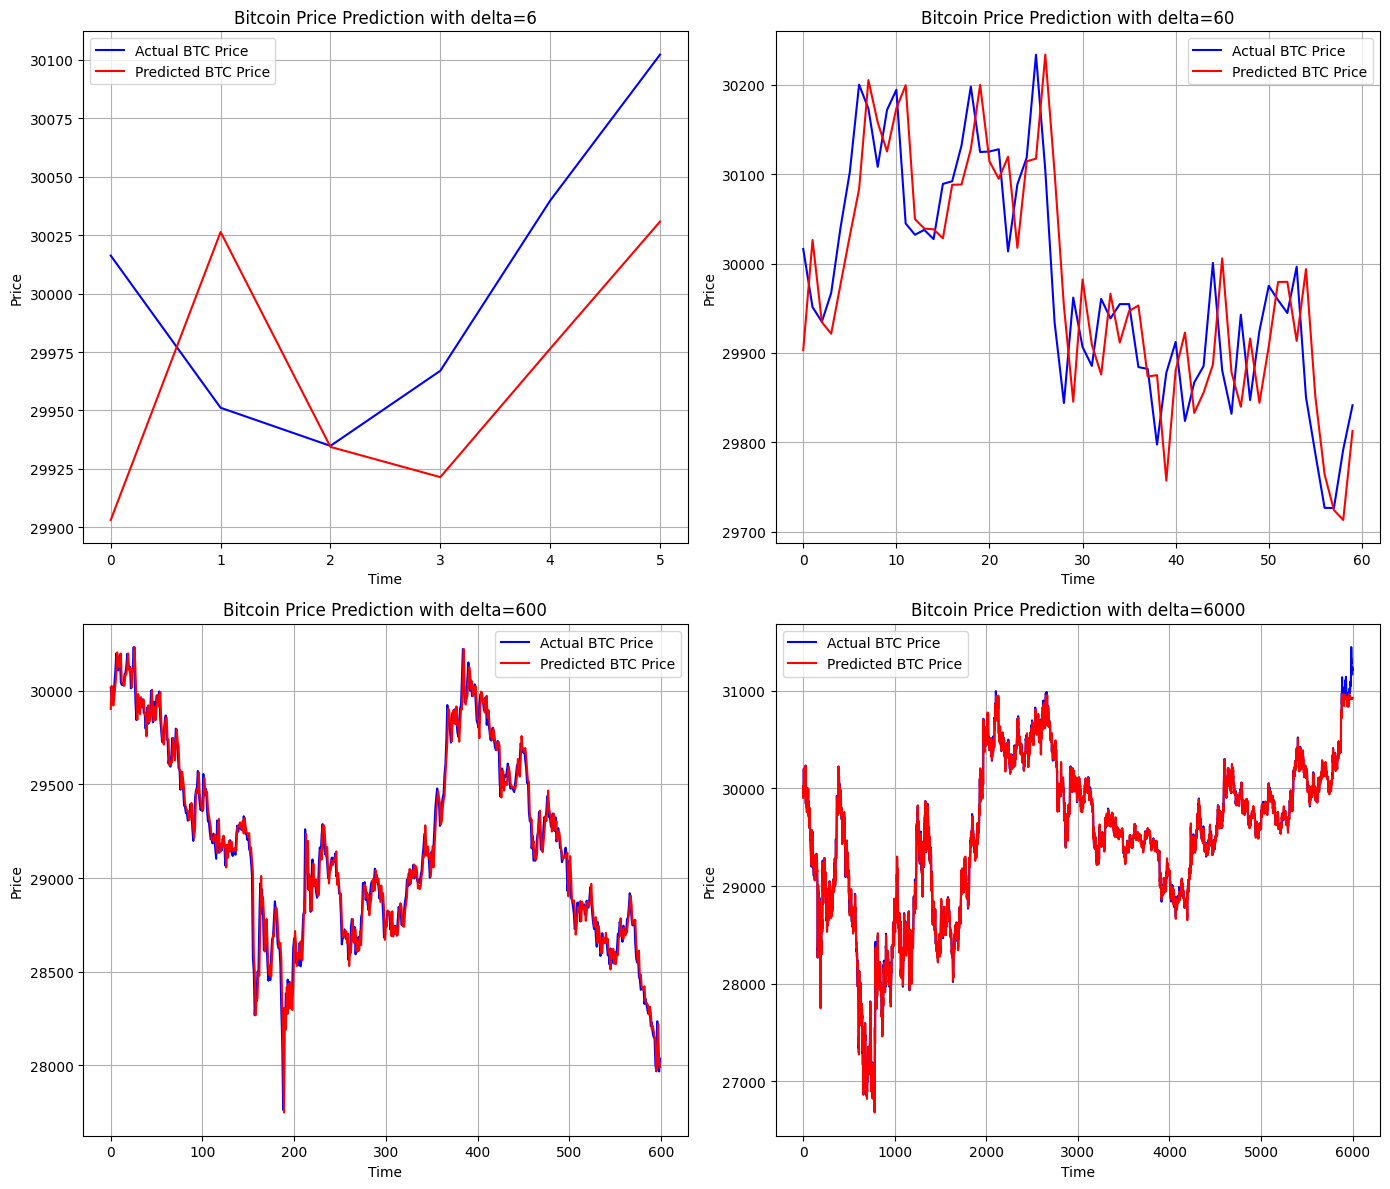

In [68]:
# history (A)

# Hyperparameters
n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
df=df[['Open Time','Close', 'Volume']]

scaled_data = df.values

X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

y_test_preds = model.predict(X_test_flat)

#entire data set
plt.figure(figsize=(14,6))
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# zoom in history, A(1/2)
start=int(1.349*10**6)
end=int(1.405*10**6)
plt.figure(figsize=(14,6))
plt.plot(y_test[start:end], color='blue', label='Actual BTC Price')
plt.plot(y_test_preds[start:end], color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# zoom in history, A(2/2):
start=int(0.62*10**6)
end=int(0.66*10**6)
plt.figure(figsize=(14,6))
plt.plot(y_test[start:end], color='blue', label='Actual BTC Price')
plt.plot(y_test_preds[start:end], color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# zoom in history, A(1/2)(1/1)

# delta values
deltas = [6, 60, 600, 6000]

# initialize the plot - 2 rows, 2 columns, so we get a 2 by 2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(14,12))
axs = axs.ravel()  # flatten the 2D array to 1D for easier iteration

# loop over each subplot
for i, delta in enumerate(deltas):
    start = int(1.3535*10**6)
    end = start + delta
    # plot on i-th subplot
    axs[i].plot(y_test[start:end], color='blue', label='Actual BTC Price')
    axs[i].plot(y_test_preds[start:end], color='red', label='Predicted BTC Price')
    axs[i].set_title(f'Bitcoin Price Prediction with delta={delta}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Price')
    axs[i].legend()
    axs[i].grid(True)

# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.tight_layout()
plt.show()

Training the model 500,000 of 1min data using only 3 features of 'Open Time', 'Close', and 'Volume'.

In [1]:
%reset -f
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from joblib import dump, load
import os
from matplotlib import pyplot as plt
import joblib
from datetime import datetime
import joblib

print("Run start time =", datetime.now())

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

# Hyperparameters
n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
end=len(df)
length = 500000
start=end-length
df = df.iloc[start:end]
df=df[['Open Time','Close', 'Volume']]

predicting_index = df.columns.get_loc('Close')
scaled_data = df.values

X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.99)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

print("started trainig...")
model.fit(X_train_flat, y_train)

print("finished trainig, making predictions...")
y_test_preds = model.predict(X_test_flat)

print("finished predictions, calculating MSE...")
mse = mean_squared_error(y_test, y_test_preds)
print("MSE: %.4f" % mse)

print("finished calculating MSE, saving model...")
joblib.dump(model, 'GB_model_data_500K_parameters_10000_1000_2_1_10_10.pkl')

print("Run end time =", datetime.now())

Run start time = 2023-07-01 19:57:27.153329
started trainig...
finished trainig, making predictions...
finished predictions, calculating MSE...
MSE: 521.1902
finished calculating MSE, saving model...
Run end time = 2023-07-01 21:51:14.921683


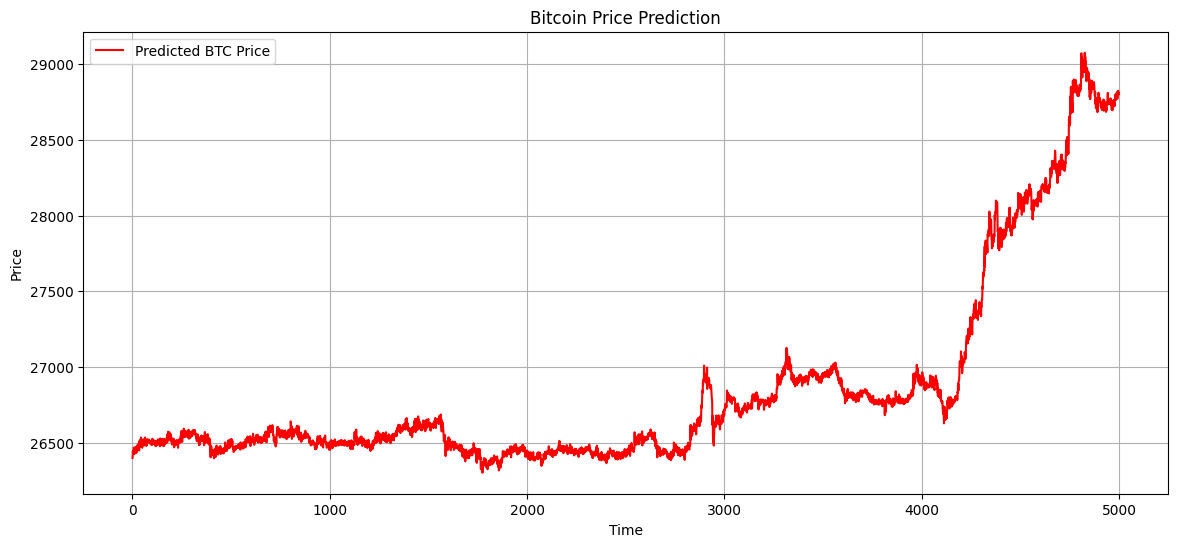

In [3]:
plt.figure(figsize=(14,6))
# p lt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

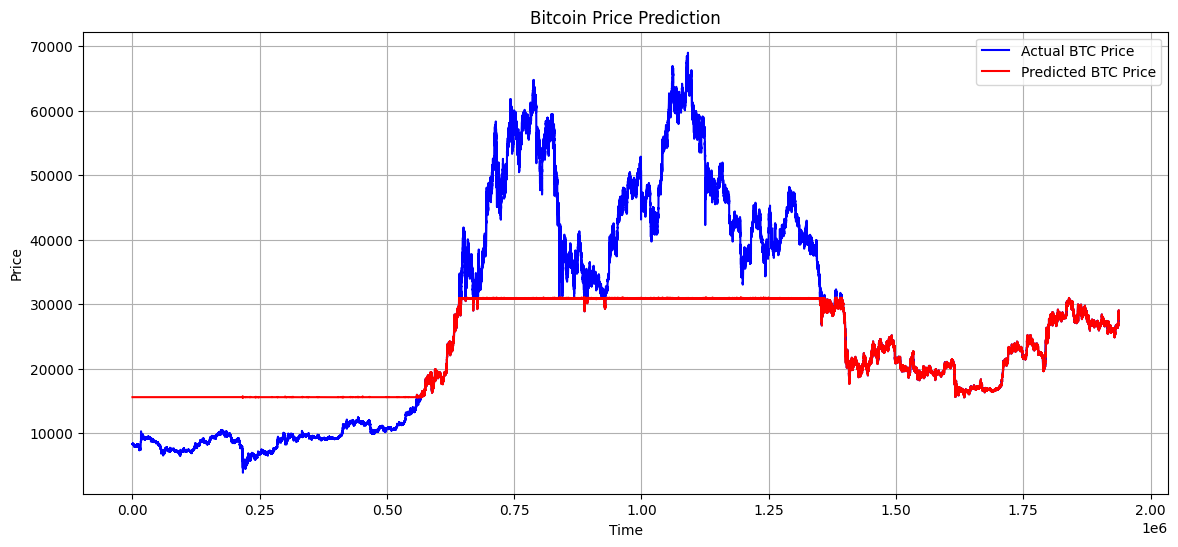

In [4]:
# history (A)

# Hyperparameters
n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
df=df[['Open Time','Close', 'Volume']]

scaled_data = df.values

X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

y_test_preds = model.predict(X_test_flat)

#entire data set
plt.figure(figsize=(14,6))
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Training a new model on 2M rows (4 years of 1min data):

In [2]:
%reset -f
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from joblib import dump, load
import os
from matplotlib import pyplot as plt
import joblib
from datetime import datetime
import joblib

print("Run start time =", datetime.now())

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

# Hyperparameters
n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
df=df[['Open Time','Close', 'Volume']]

predicting_index = df.columns.get_loc('Close')
scaled_data = df.values

X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.99)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

print("started trainig...")
model.fit(X_train_flat, y_train)

print("finished trainig, making predictions...")
y_test_preds = model.predict(X_test_flat)

print("finished predictions, calculating MSE...")
mse = mean_squared_error(y_test, y_test_preds)
print("MSE: %.4f" % mse)

print("finished calculating MSE, saving model...")
joblib.dump(model, 'GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl')

print("Run end time =", datetime.now())

Run start time = 2023-07-02 00:35:04.726603
started trainig...
finished trainig, making predictions...
finished predictions, calculating MSE...
MSE: 879.3614
finished calculating MSE, saving model...
Run end time = 2023-07-02 17:54:59.644173


The same model but for 2M rows was modeled in the upper code. The test dataset was 4X more but MSE only increased to 879 (from 521).

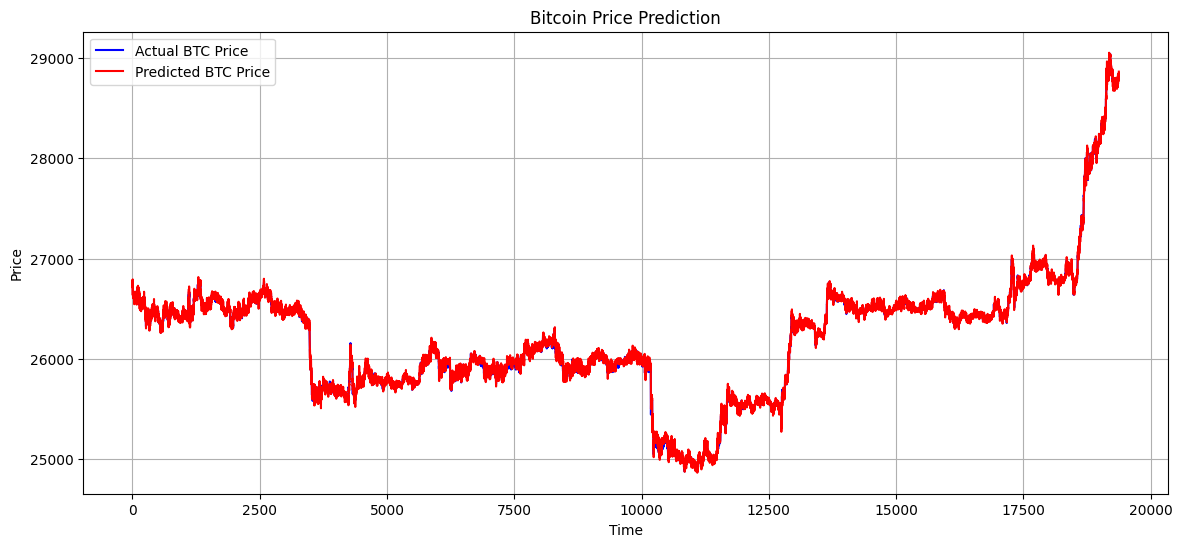

In [3]:
plt.figure(figsize=(14,6))
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

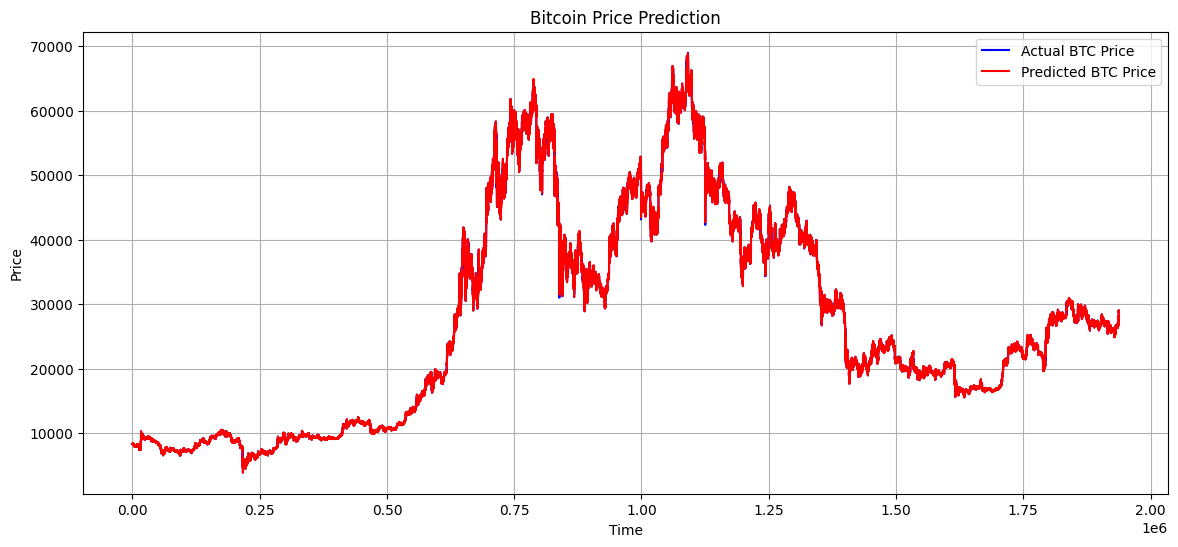

In [9]:
# history (A)

# Hyperparameters
n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
df=df[['Open Time','Close', 'Volume']]

scaled_data = df.values

X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

y_test_preds = model.predict(X_test_flat)

#entire data set
plt.figure(figsize=(14,6))
plt.plot(y_test, color='blue', label='Actual BTC Price')
plt.plot(y_test_preds, color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

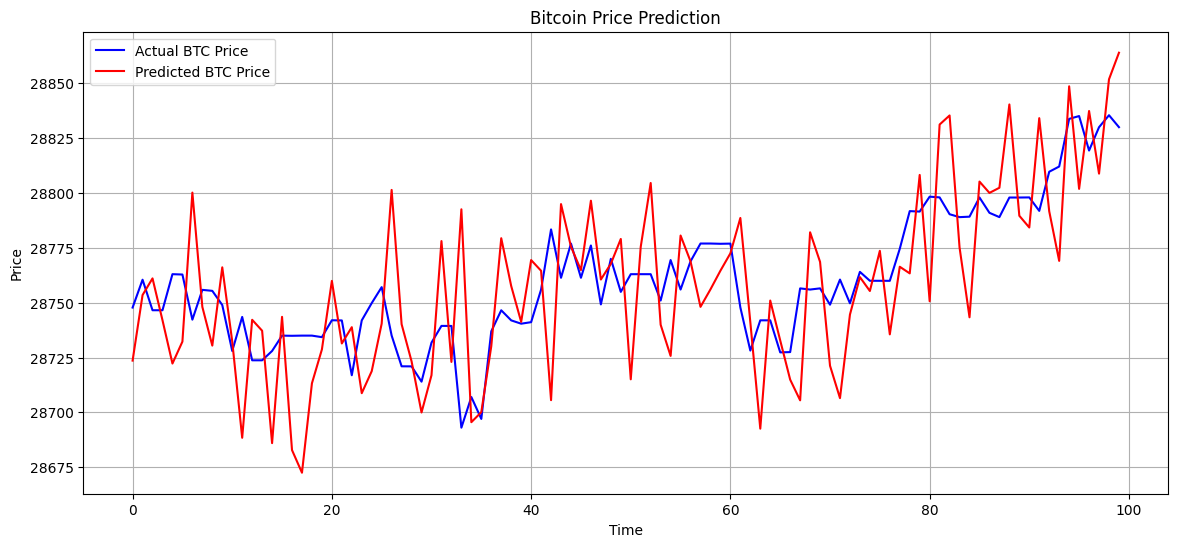

In [10]:
tt=-100
plt.figure(figsize=(14,6))
plt.plot(y_test[tt:], color='blue', label='Actual BTC Price')
plt.plot(y_test_preds[tt:], color='red', label='Predicted BTC Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# caclulate MSE for the last 5000 data points

n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
df=df[['Open Time','Close', 'Volume']]

scaled_data = df.values
predicting_index = df.columns.get_loc('Close')

model_parameters_file = 'GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'

model = GradientBoostingRegressor(n_estimators=10000,  
                                  max_depth=1000,      
                                  min_samples_split=2,
                                  learning_rate=1, 
                                  min_samples_leaf=10,
                                  n_iter_no_change=10, 
                                  loss='squared_error')

model = joblib.load(model_parameters_file)


X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.9975) # 0.0025*2e6 = 5000

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

y_test_preds = model.predict(X_test_flat)

mse = mean_squared_error(y_test, y_test_preds)
print("MSE: %.4f" % mse)

MSE: 637.5365


In [11]:
# caclulate MSE for the last 20K-2K data points

n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
df=df[['Open Time','Close', 'Volume']]

scaled_data = df.values
predicting_index = df.columns.get_loc('Close')

model_parameters_file = 'GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'


X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

n = len(X)

X_train, X_test = X[:n-20000], X[n-20000:n-5000]
y_train, y_test = y[:n-20000], y[n-20000:n-5000]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

y_test_preds = model.predict(X_test_flat)

mse = mean_squared_error(y_test, y_test_preds)
print("MSE: %.4f" % mse)

MSE: 935.3028


In [14]:
# caclulate MSE for the last 20K data points

n_steps = 30

input_filename = "../LSTM/BTCUSDT4Y1MKline_cleaned_24features_nSteps"+str(n_steps)+".csv"

df = pd.read_csv(input_filename)
df=df[['Open Time','Close', 'Volume']]

scaled_data = df.values
predicting_index = df.columns.get_loc('Close')

model_parameters_file = 'GB_model_data_2M_main_parameters_10000_1000_2_1_10_10.pkl'


X = []
y = []

for i in range(n_steps, len(scaled_data)-1):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i, predicting_index])
X = np.array(X)
y = np.array(y)

n = len(X)

X_train, X_test = X[:n-20000], X[n-20000:]
y_train, y_test = y[:n-20000], y[n-20000:]

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# flatten input
n_input = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape((X_train.shape[0], n_input))
X_test_flat = X_test.reshape((X_test.shape[0], n_input))

y_test_preds = model.predict(X_test_flat)

mse = mean_squared_error(y_test, y_test_preds)
print("MSE: %.4f" % mse)

MSE: 858.0719


In [21]:
mse = 858.0719
std = mse**0.5 # standard deviation of the prediction error
# average y_test
y_test_avg = np.mean(y_test)
# std of y_test
y_test_std = np.std(y_test)
print("std_error: %.4f" % std)
print("std_error/y_test_avg percent: %.4f" % (std/y_test_avg*100))
print("std of y_test: %.4f" % y_test_std)
print("std of y_test/y_test_avg percent: %.4f" % (y_test_std/y_test_avg*100))

std_error: 29.2929
std_error/y_test_avg percent: 0.1117
std of y_test: 632.0768
std of y_test/y_test_avg percent: 2.4099
